In [44]:
import numpy as np
import pandas as pd
import sklearn
import pylab as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

### Analysis and machine learning
This notebook uses thee `auto-mpg` dataset to illustrate a typical work-flow: load data, handle missing values, exploratory visualization, build a model, evaluate the model.

#### 1. Load and inspect dataset

In [11]:
mpg_url = "https://github.com/mwaskom/seaborn-data/raw/master/mpg.csv"

In [12]:
df = pd.read_csv(mpg_url)

In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [18]:
df.shape

(398, 9)

#### 2. Missing values? Handle them.

In [16]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(392, 9)

#### 3. Exploratory visualization

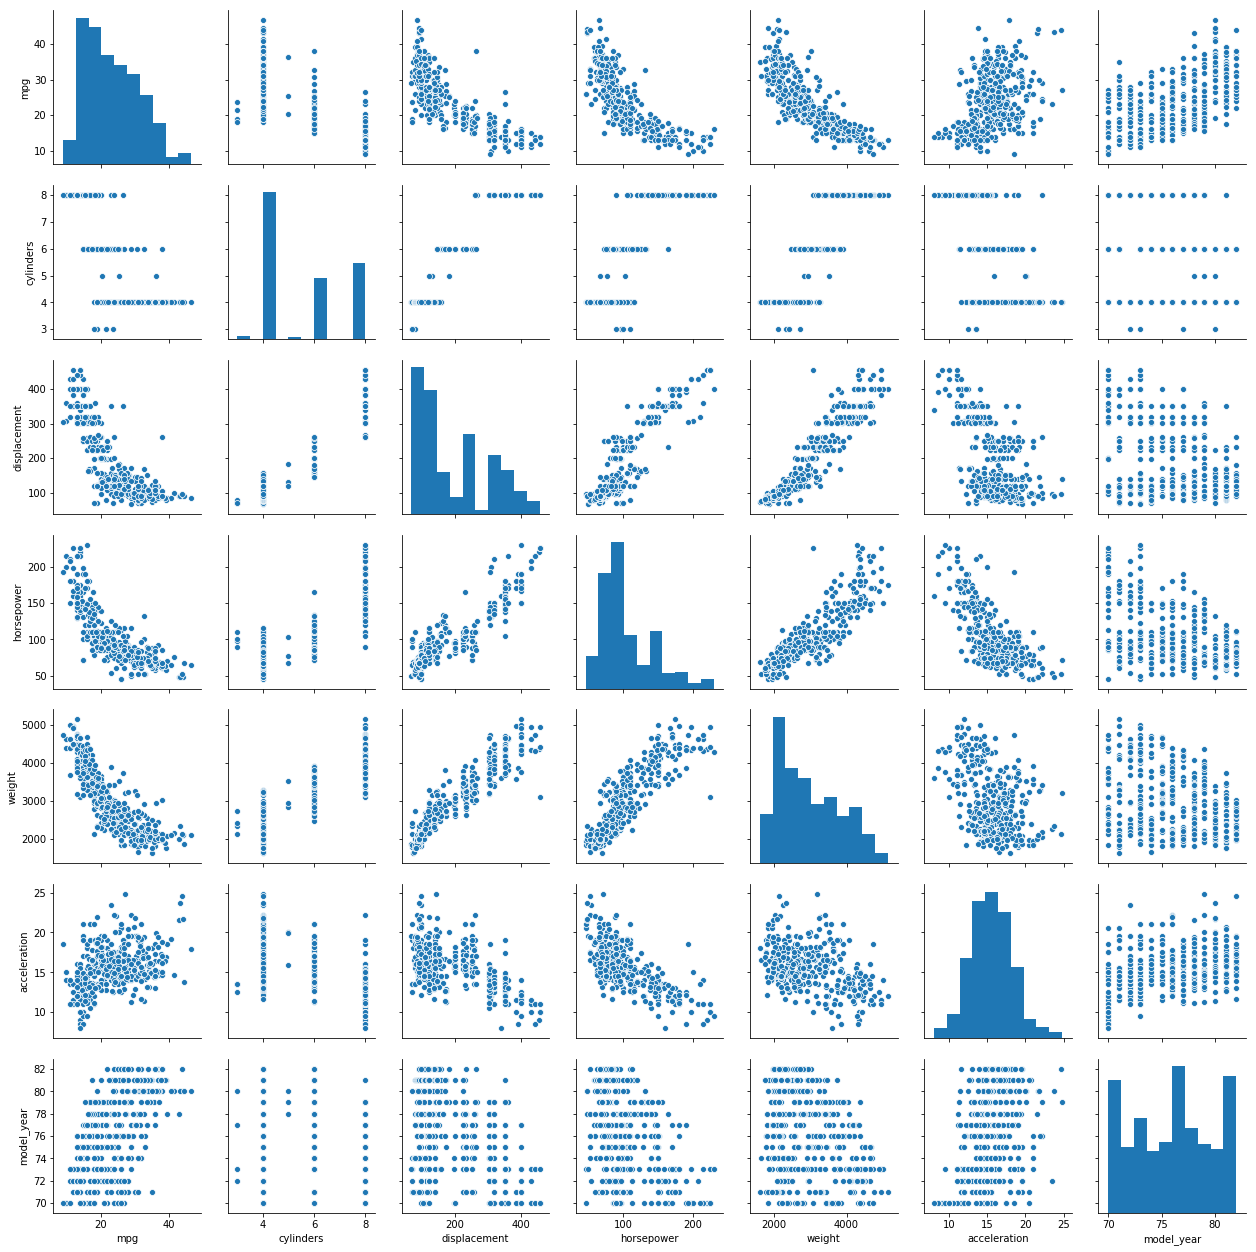

In [22]:
sns.pairplot(df)

In [24]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


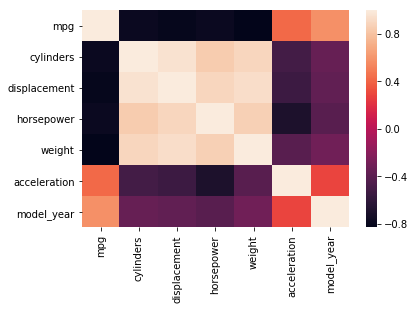

In [23]:
sns.heatmap(df.corr())

#### 4. Train-test split

In [30]:
#Select Predictor columns
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]

#Select target column
y = df['mpg']

In [31]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [32]:
print(X_train.shape)

(313, 6)


In [33]:
print(X_test.shape)

(79, 6)


#### 5. Train model(s)

In [35]:
# train a simple linear regression

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# what coefficients did it produce?

cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
list(zip(cols, regr.coef_))

In [46]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

/Users/nicholasjones/anaconda3/envs/GPD/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### 6. Evaluate model accuracy

In [53]:
#Mean Squared error and R-squared on the training set

preds_LR = regr.predict(X_train)
mse_LR = np.mean((preds - y_train) ** 2)
rsq_LR = regr.score(X_train, y_train)

print("Mean Squared Error: %.4f \n R-squared: %.4f" % (mse_LR,rsq_LR))

Mean Squared Error: 1.5251 
 R-squared: 0.8046


In [54]:
#Mean Squared error and R-squared on the training set

preds_RF = rf.predict(X_train)
mse_RF = np.mean((preds - y_train) ** 2)
rsq_RF = rf.score(X_train, y_train)

print("Mean Squared Error: %.4f \n R-squared: %.4f" % (mse_RF,rsq_RF))

Mean Squared Error: 1.5251 
 R-squared: 0.9747


In [61]:
outputs = pd.DataFrame({"linear regression model":rsq_LR,
             "random forest model":rsq_RF}, index = ['r-squared'])
outputs

,linear regression model,random forest model
r-squared,0.804555,0.974734


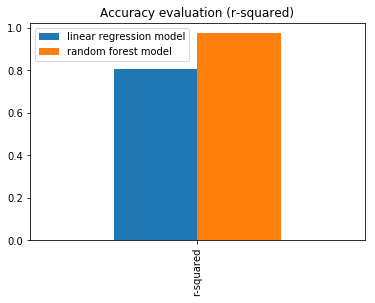

In [63]:
outputs.plot(kind = 'bar', title = "Accuracy evaluation (r-squared)")